# HomeWork 9

**DeadLine : 23:59 19 Azar 1401**

**Total points : 100pts**


Import some prerequisites:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

Run this cell for plotting.

In [7]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 3

**Point : 35 pts**

Here is for your helper functions(optional).

In [96]:
def threshold(img):
    ret, im = cv2.threshold(img, 127, 1, 0)
    return im

def invert_color(img):
    im = np.zeros_like(img)
    im[img == 0] = 1
    return im

Implement this function to get the input image and return the skeleton of the input image.

In [97]:
def get_skeleton(image):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
        numpy.ndarray: The parameters required for reconstructing image
    """
    
    res = image.copy()
    params = []

    #Write your code here
    res = invert_color(threshold(res))

    skeleton = np.zeros_like(res)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    k = 0

    while cv2.countNonZero(res):
        open = cv2.morphologyEx(res, cv2.MORPH_OPEN, element)
        s_k = cv2.subtract(res, open)
        params.append((k, s_k))
        erode = cv2.erode(res, element)
        skeleton = np.bitwise_or(skeleton, s_k)
        res = erode.copy()
        k += 1
    
    return skeleton, params

Test your implementation (don't change this cell).

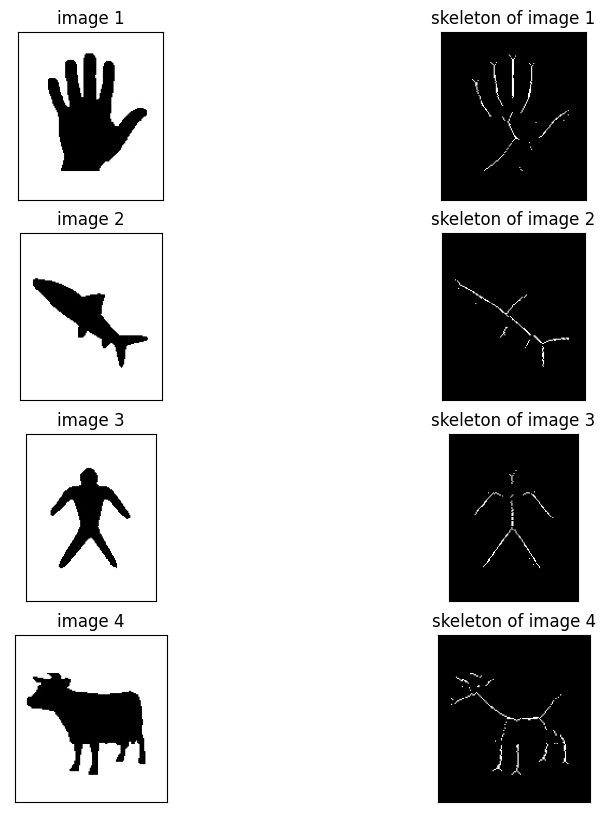

In [98]:
image_list = []

image1 = cv2.imread('images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton, params1 = get_skeleton(image1)
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread('images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton, params2 = get_skeleton(image2)
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread('images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton, params3 = get_skeleton(image3)
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread('images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton, params4 = get_skeleton(image4)
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-a')

Implement this function to get the input image as skeleton and return the reconstruction of the skeleton.

In [99]:
def recons_skeleton(image, params):
    """
    Finds the original image from the skeleton.
    
    Parameters:
        image (numpy.ndarray): The skeleton of image.
        params (numpy.ndarray): The parameters required for reconstructing image
    
    Returns:
        numpy.ndarray: The original image.  
    """
    
    # res = image.copy()
    res = np.zeros_like(image)
    
    #Write your code here
    
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    
    for k, s_k in params:
        dilation = cv2.dilate(s_k, element, iterations=k)
        res = np.bitwise_or(res, dilation)
    res = invert_color(res)
    return res

Test your implementation (don't change this cell).

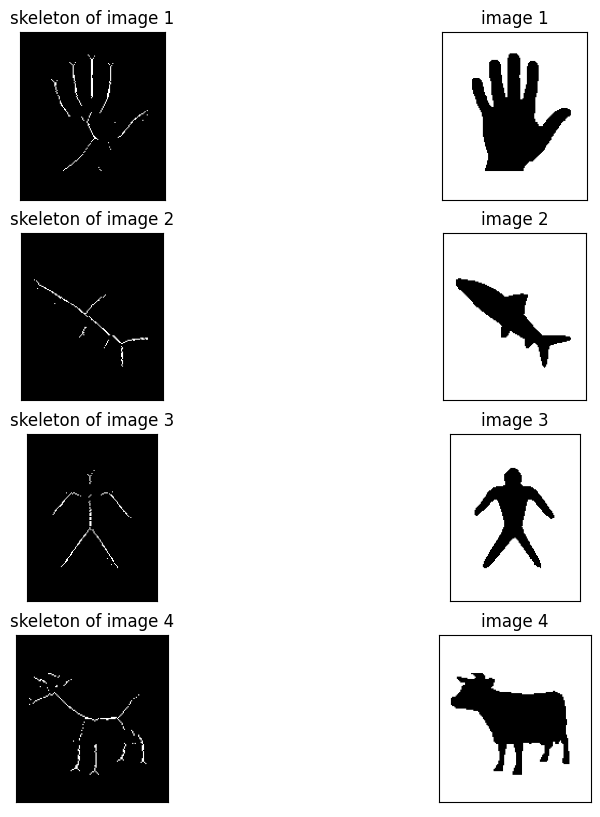

In [100]:
image_list = []

image_list.append([image1_skeleton, 'skeleton of image 1', 'img'])
image_list.append([recons_skeleton(image1_skeleton, params1), 'image 1','img'])

image_list.append([image2_skeleton, 'skeleton of image 2', 'img'])
image_list.append([recons_skeleton(image2_skeleton, params2), 'image 2','img'])

image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])
image_list.append([recons_skeleton(image3_skeleton, params3), 'image 3', 'img'])

image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])
image_list.append([recons_skeleton(image4_skeleton, params4), 'image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-b')

# PART 4

**Point : 30 pts**

Here is for your helper functions(optional).

Implement this function to detect shapes and number of cars in an input image.

In [12]:
def detect_car_num(image):
    '''
    Detects shapes and number of cars in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of cars
    '''
    
    result = image.copy()
    cars_num = 0
    
    #Write your code here
    gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    ret, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    opening_element = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 13))
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, opening_element)
    closing_element = cv2.getStructuringElement(cv2.MORPH_RECT, (27, 27))
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, closing_element)
    
    cnts = cv2.findContours(closing.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    for c in cnts:
	# compute the center of the contour
        cars_num += 1
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        # draw the contour and center of the shape on the image
        cv2.drawContours(result, [c], -1, (0, 255, 0), 2)
        cv2.circle(result, (cX, cY), 7, (255, 255, 255), -1)
        cv2.putText(result, "center", (cX - 20, cY - 20),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    
    return result, cars_num

Test your implementation (don't change this cell).

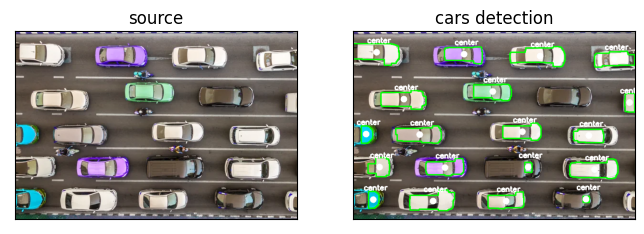

In [13]:
image_list = []
image = cv2.imread('images/img5.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_car_num(image)[0], 'cars detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-a')

Implement this function to detect shapes and number of flowers in an input image.

In [16]:
def detect_flower_num(image):
    '''
    Detects shapes and number of flowers in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of flowers
    '''
    
    result = image.copy()
    flowers_num = 0
    
    #Write your code here
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    canny = cv2.Canny(blurred, 100, 120)
    close = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, element)
    dilate = cv2.dilate(close, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
    cnts = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    for c in cnts:
        M = cv2.moments(c)
        cX = int((M["m10"] / M["m00"]))
        cY = int((M["m01"] / M["m00"]))

        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)

        if len(approx) in [3, 4, 5]:
            continue

        c = c.astype("int")
        cv2.drawContours(result, [c], -1, (0, 255, 0), 2)
        cv2.putText(result, 'circle', (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
            
        flowers_num += 1
    
    return result,flowers_num

Test your implementation (don't change this cell).

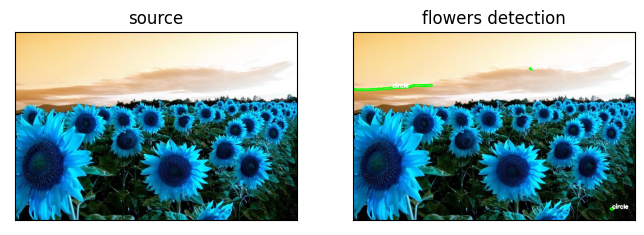

In [17]:
image_list = []
image = cv2.imread('images/img6.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_flower_num(image)[0], 'flowers detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-b')

End!!!